Loaded meta_train.csv. Shape: (10407, 4)


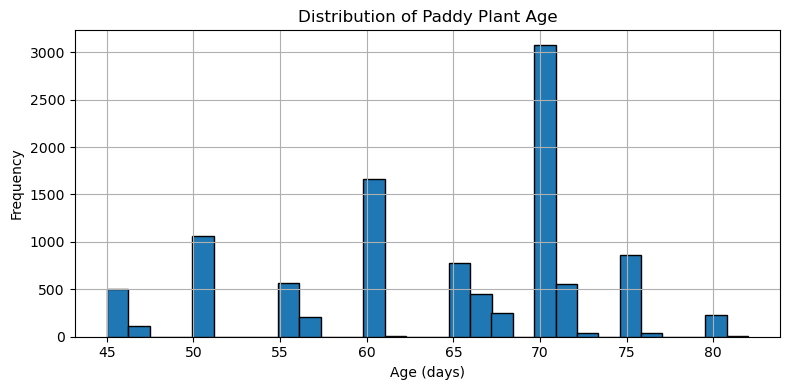

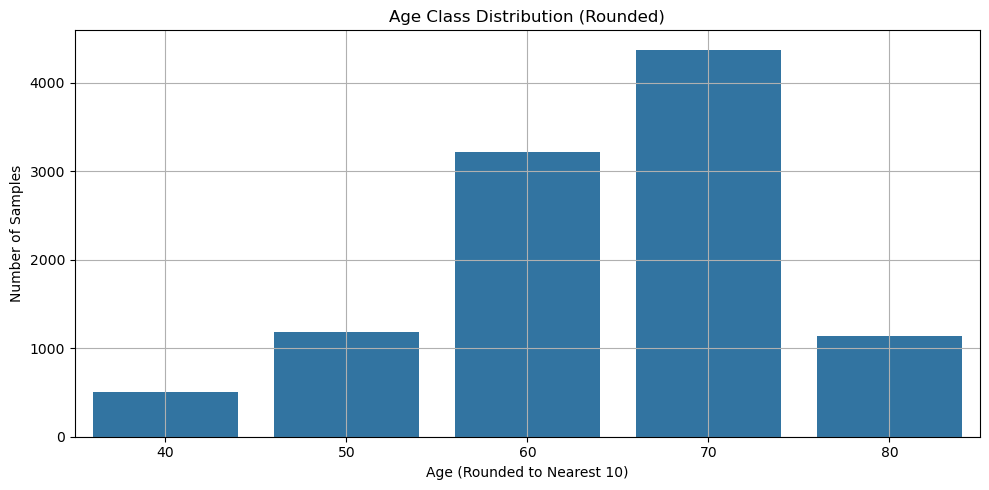

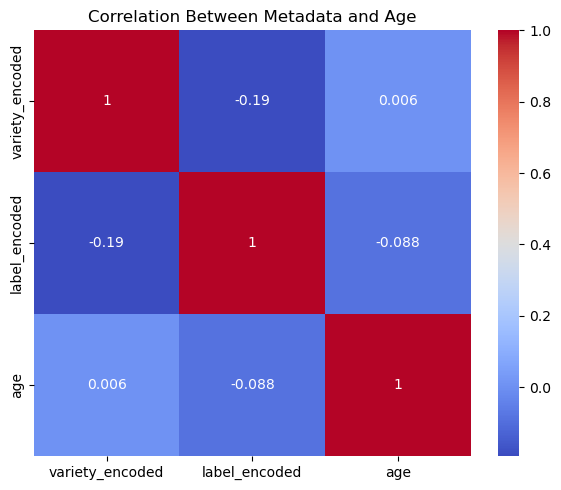

Found image: 100330.jpg
Original size: (480, 640)


In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# === Future-Proof Path Setup === #
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))

PATHS = {
    "csv": os.path.join(BASE_PATH, "meta_train.csv"),
    "train_images": os.path.join(BASE_PATH, "dataset", "train"),
    "val_images": os.path.join(BASE_PATH, "dataset", "val"),  # Optional for later use
    "test_images": os.path.join(BASE_PATH, "test_images"),
    "submission_format": os.path.join(BASE_PATH, "prediction_submission.csv"),
    "output_dir": os.path.join(BASE_PATH, "outputs_task3")
}

os.makedirs(PATHS["output_dir"], exist_ok=True)

# === Load Data === #
df = pd.read_csv(PATHS["csv"])
print("Loaded meta_train.csv. Shape:", df.shape)

# === Plot Age Distribution === #
plt.figure(figsize=(8, 4))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Distribution of Paddy Plant Age')
plt.xlabel('Age (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot Age Distribution Cleanly === #
df['age_class'] = df['age'].round(-1).astype(int)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='age_class', order=sorted(df['age_class'].unique()))
plt.title("Age Class Distribution (Rounded)")
plt.xlabel("Age (Rounded to Nearest 10)")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.show()


# === Correlation Heatmap === #
df['variety_encoded'] = df['variety'].astype('category').cat.codes
df['label_encoded'] = df['label'].astype('category').cat.codes

plt.figure(figsize=(6, 5))
sns.heatmap(df[['variety_encoded', 'label_encoded', 'age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Metadata and Age')
plt.tight_layout()
plt.show()

from pathlib import Path
from PIL import Image

sample_image_id = df['image_id'].iloc[0]  # e.g., '100330.jpg'
found_path = None

# Recursively search for the image in all subfolders of train_images/
for root, dirs, files in os.walk(PATHS["train_images"]):
    if sample_image_id in files:
        found_path = os.path.join(root, sample_image_id)
        break

if found_path:
    img = Image.open(found_path)
    print(f"Found image: {sample_image_id}")
    print(f"Original size: {img.size}")
    img.show()
else:
    print(f"Image {sample_image_id} not found in any subfolder of train_images/")


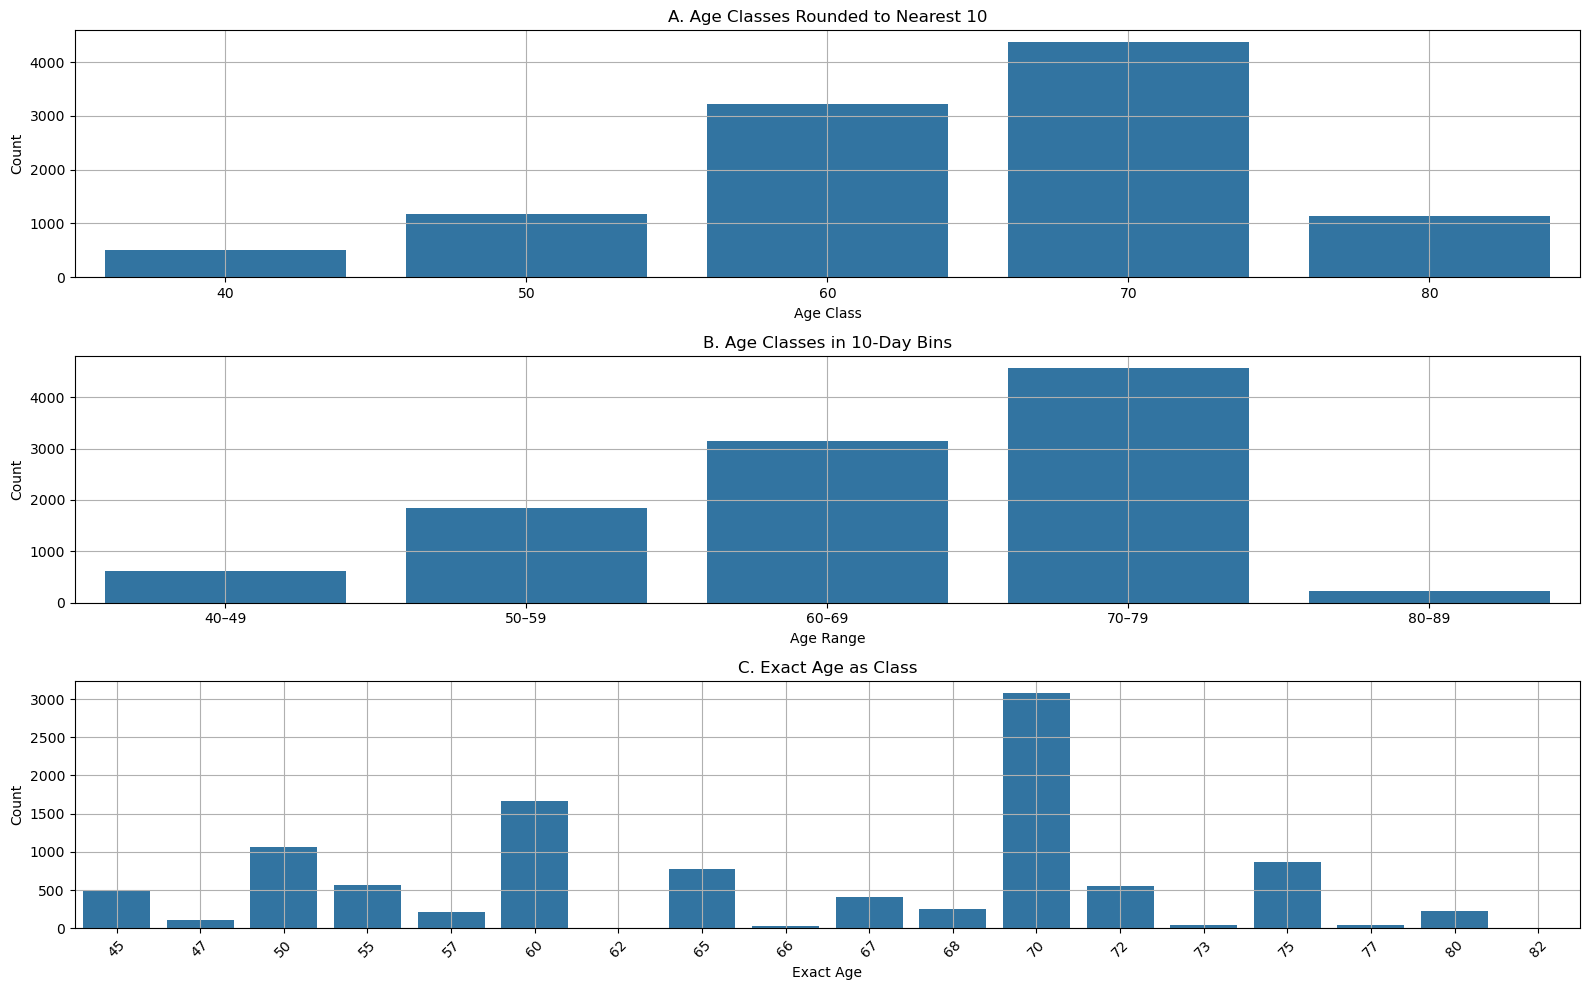

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIG ===
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
META_CSV = os.path.join(BASE_PATH, "meta_train.csv")

# === Load metadata ===
df = pd.read_csv(META_CSV)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# === Option A: Rounded to nearest 10 ===
df['age_class_round10'] = df['age'].round(-1).astype(int)

# === Option B: Custom bins (10-day ranges)
bins = [40, 50, 60, 70, 80, 90]
labels = ['40–49', '50–59', '60–69', '70–79', '80–89']
df['age_class_bins'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# === Option C: Exact age as class (discrete) ===
df['age_class_exact'] = df['age'].astype(int)

# === Plot all 3 strategies ===
plt.figure(figsize=(16, 10))

# A: Rounded
plt.subplot(3, 1, 1)
sns.countplot(x='age_class_round10', data=df, order=sorted(df['age_class_round10'].unique()))
plt.title("A. Age Classes Rounded to Nearest 10")
plt.xlabel("Age Class")
plt.ylabel("Count")
plt.grid(True)

# B: Binned
plt.subplot(3, 1, 2)
sns.countplot(x='age_class_bins', data=df)
plt.title("B. Age Classes in 10-Day Bins")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.grid(True)

# C: Exact
plt.subplot(3, 1, 3)
sns.countplot(x='age_class_exact', data=df, order=sorted(df['age_class_exact'].unique()))
plt.title("C. Exact Age as Class")
plt.xlabel("Exact Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


[INFO] Age Class Counts:
  Age 40: 505 samples
  Age 50: 1178 samples
  Age 60: 3215 samples
  Age 70: 4371 samples
  Age 80: 1138 samples

[STATS] Max class count: 4371
[STATS] Min class count: 505
[STATS] Imbalance ratio (max/min): 8.66


/var/folders/l_/2tbf5tf961vg06w5znf_dhnr0000gn/T/ipykernel_41230/2178620722.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, palette="Blues_d")


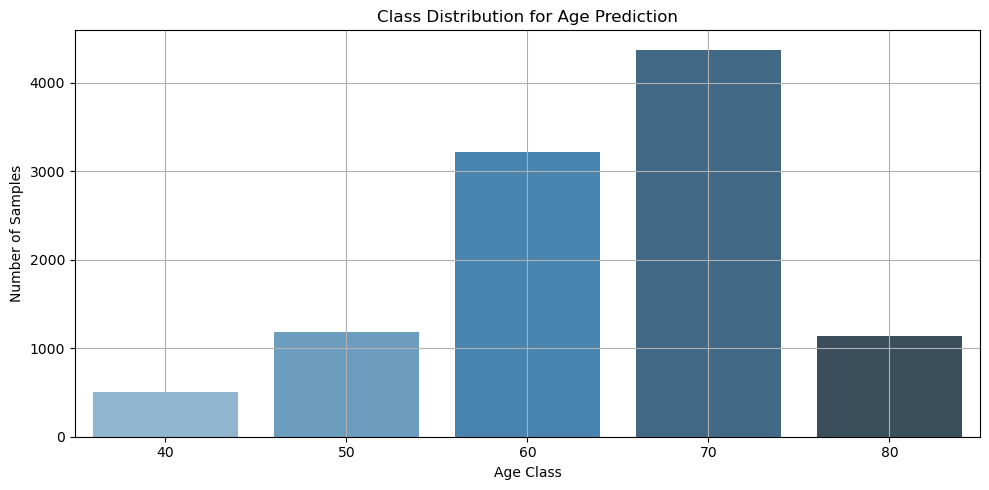

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIG ===
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
META_CSV = os.path.join(BASE_PATH, "meta_train.csv")

# === Load data ===
df = pd.read_csv(META_CSV)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age_class'] = df['age'].round(-1).astype(int)  # Or use binning strategy here

# === Count samples per class ===
class_counts = df['age_class'].value_counts().sort_index()

# === Print imbalance summary ===
print("[INFO] Age Class Counts:")
for age_class, count in class_counts.items():
    print(f"  Age {age_class}: {count} samples")

min_count = class_counts.min()
max_count = class_counts.max()
ratio = max_count / min_count

print(f"\n[STATS] Max class count: {max_count}")
print(f"[STATS] Min class count: {min_count}")
print(f"[STATS] Imbalance ratio (max/min): {ratio:.2f}")

# === Plot ===
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, palette="Blues_d")
plt.title("Class Distribution for Age Prediction")
plt.xlabel("Age Class")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
import os
import shutil
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# === CONFIG ===
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
META_CSV = os.path.join(BASE_PATH, "meta_train.csv")
SOURCE_DIR = os.path.join(BASE_PATH, "dataset", "train")
TARGET_DIR = os.path.join(BASE_PATH, "dataset_age", "train")
IMG_EXT = (".jpg", ".jpeg", ".png")

# === Load metadata and assign age classes ===
df = pd.read_csv(META_CSV)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age', 'image_id', 'label'])
df['age_class'] = df['age'].round(-1).astype(int)

# === Build image path lookup ===
image_paths = []
for root, dirs, files in os.walk(SOURCE_DIR):
    for file in files:
        if file.lower().endswith(IMG_EXT):
            image_paths.append(os.path.join(root, file))

image_path_map = {os.path.basename(p): p for p in image_paths}

# === Create dataset_age/train/<age_class>/ structure ===
if os.path.exists(TARGET_DIR):
    shutil.rmtree(TARGET_DIR)

missing_images = 0
for _, row in df.iterrows():
    image_name = row['image_id']
    age_class = str(int(row['age_class']))
    if image_name not in image_path_map:
        missing_images += 1
        continue
    src_path = image_path_map[image_name]
    dest_dir = os.path.join(TARGET_DIR, age_class)
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy(src_path, os.path.join(dest_dir, image_name))

print(f"[INFO] Missing images: {missing_images}")
print(f"[INFO] Dataset copied to: {TARGET_DIR}")

# === Compute class weights ===
class_counts = df['age_class'].value_counts().sort_index()
classes = np.array(sorted(class_counts.index))
class_weights_arr = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=df['age_class']
)
class_weight_dict = dict(zip(classes, class_weights_arr))

print("\n[INFO] Class weights:")
for k, v in class_weight_dict.items():
    print(f"  Age {k}: {v:.4f}")


[INFO] Missing images: 2082
[INFO] Dataset copied to: /Users/anluu/Library/CloudStorage/OneDrive-RMITUniversity/personal/Rice-paddy-image-ML-system/dataset_age/train

[INFO] Class weights:
  Age 40: 4.1216
  Age 50: 1.7669
  Age 60: 0.6474
  Age 70: 0.4762
  Age 80: 1.8290


In [56]:
import os
import shutil
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# === CONFIG ===
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
META_CSV = os.path.join(BASE_PATH, "meta_train.csv")
SOURCE_DIR = os.path.join(BASE_PATH, "dataset", "val")        # <<< CHANGED
TARGET_DIR = os.path.join(BASE_PATH, "dataset_age", "val")    # <<< CHANGED
IMG_EXT = (".jpg", ".jpeg", ".png")

# === Load metadata and assign age classes ===
df = pd.read_csv(META_CSV)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age', 'image_id', 'label'])
df['age_class'] = df['age'].round(-1).astype(int)

# === Build image path lookup ===
image_paths = []
for root, dirs, files in os.walk(SOURCE_DIR):
    for file in files:
        if file.lower().endswith(IMG_EXT):
            image_paths.append(os.path.join(root, file))

image_path_map = {os.path.basename(p): p for p in image_paths}

# === Create dataset_age/val/<age_class>/ structure ===
if os.path.exists(TARGET_DIR):
    shutil.rmtree(TARGET_DIR)

missing_images = 0
used_labels = []

for _, row in df.iterrows():
    image_name = row['image_id']
    age_class = str(int(row['age_class']))
    if image_name not in image_path_map:
        missing_images += 1
        continue
    src_path = image_path_map[image_name]
    dest_dir = os.path.join(TARGET_DIR, age_class)
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy(src_path, os.path.join(dest_dir, image_name))
    used_labels.append(age_class)

print(f"[INFO] Missing images: {missing_images}")
print(f"[INFO] Dataset copied to: {TARGET_DIR}")


[INFO] Missing images: 8325
[INFO] Dataset copied to: /Users/anluu/Library/CloudStorage/OneDrive-RMITUniversity/personal/Rice-paddy-image-ML-system/dataset_age/val


Found 8325 files belonging to 5 classes.
Found 2082 files belonging to 5 classes.
Epoch 1/10


2025-06-01 16:07:11.873256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 1.6217 - accuracy: 0.1832

2025-06-01 16:07:54.933064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 72s 205ms/step - loss: 1.6217 - accuracy: 0.1832 - val_loss: 1.5319 - val_accuracy: 0.4299
Epoch 2/10
261/261 [==============================] - 47s 177ms/step - loss: 1.6241 - accuracy: 0.1957 - val_loss: 1.5148 - val_accuracy: 0.2959
Epoch 3/10
261/261 [==============================] - 47s 180ms/step - loss: 1.6234 - accuracy: 0.1766 - val_loss: 1.5323 - val_accuracy: 0.4299
Epoch 4/10
261/261 [==============================] - 48s 182ms/step - loss: 1.6240 - accuracy: 0.1685 - val_loss: 1.5721 - val_accuracy: 0.4332
Epoch 5/10
261/261 [==============================] - 48s 182ms/step - loss: 1.6200 - accuracy: 0.1876 - val_loss: 1.5253 - val_accuracy: 0.4299
Epoch 6/10
261/261 [==============================] - 47s 178ms/step - loss: 1.6169 - accuracy: 0.1910 - val_loss: 1.5202 - val_accuracy: 0.2959
Epoch 7/10
261/261 [==============================] - 45s 173ms/step - loss: 1.6182 - accuracy: 0.1876 - val_loss: 1.5820 - val_accuracy: 0.1

2025-06-01 16:15:13.474159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 1.6330 - accuracy: 0.1391

2025-06-01 16:17:38.179666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 160s 548ms/step - loss: 1.6330 - accuracy: 0.1391 - val_loss: 1.5948 - val_accuracy: 0.0466
Epoch 11/20
261/261 [==============================] - 138s 528ms/step - loss: 1.6174 - accuracy: 0.1302 - val_loss: 1.6095 - val_accuracy: 0.0466
Epoch 12/20
261/261 [==============================] - 137s 523ms/step - loss: 1.6141 - accuracy: 0.1028 - val_loss: 1.6083 - val_accuracy: 0.1071
Epoch 13/20
261/261 [==============================] - 135s 517ms/step - loss: 1.6135 - accuracy: 0.1327 - val_loss: 1.6058 - val_accuracy: 0.0466
Epoch 14/20
261/261 [==============================] - 136s 518ms/step - loss: 1.6129 - accuracy: 0.1177 - val_loss: 1.6105 - val_accuracy: 0.0466
Epoch 15/20
261/261 [==============================] - 138s 526ms/step - loss: 1.6123 - accuracy: 0.1174 - val_loss: 1.6075 - val_accuracy: 0.0466
Epoch 16/20
261/261 [==============================] - 117s 445ms/step - loss: 1.6127 - accuracy: 0.1135 - val_loss: 1.6121 - val_

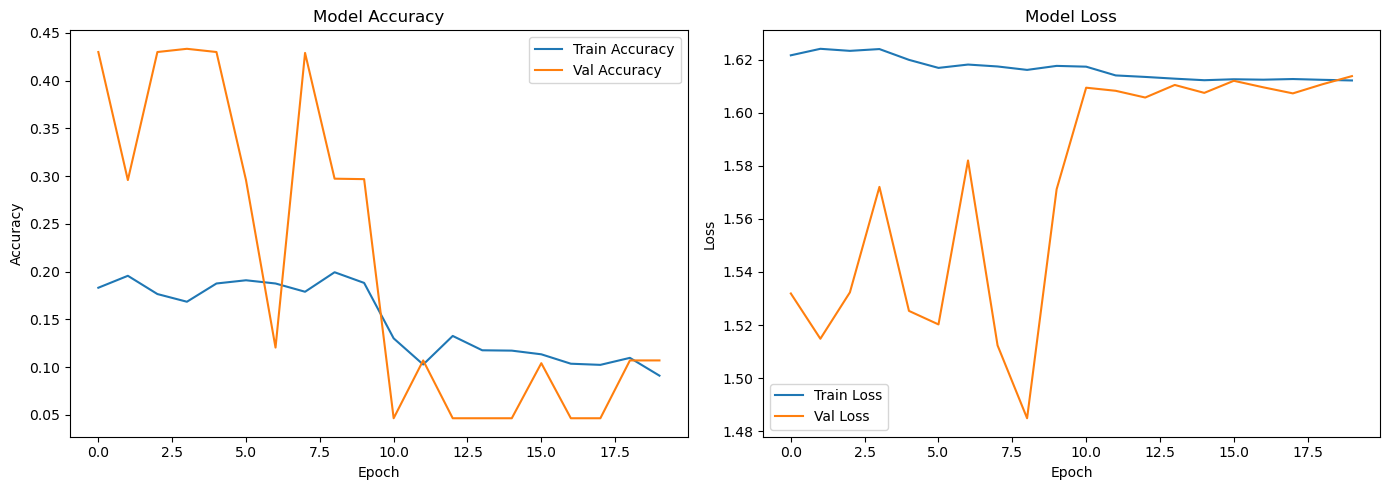

In [57]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2B0
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam  


# === CONFIG ===
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS_INITIAL = 10
FINE_TUNE_EPOCHS = 10
SEED = 123

# Original age-class-based weights (age: weight)
class_weight_dict = {
    40: 4.1216,
    50: 1.7669,
    60: 0.6474,
    70: 0.4762,
    80: 1.8290
}

# === PATH SETUP ===
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Run from MLmodels/
TRAIN_DIR = os.path.join(BASE_PATH, "dataset_age", "train")
VAL_DIR = os.path.join(BASE_PATH, "dataset_age", "val")

# === RAW DATASETS (retain class_names before .map) ===
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

raw_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VAL_DIR,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Extract class names BEFORE mapping
class_names = raw_train_ds.class_names  # ['40', '50', ...]

# Apply normalization
normalization_layer = layers.Rescaling(1. / 255)
train_ds = raw_train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = raw_val_ds.map(lambda x, y: (normalization_layer(x), y))


age_to_index = {int(name): idx for idx, name in enumerate(class_names)}
class_weight_indexed = {age_to_index[k]: v for k, v in class_weight_dict.items()}

# === MODEL SETUP ===
base_model = EfficientNetV2B0(include_top=False, weights=None, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze at first

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model = keras.Model(inputs, outputs)

# Initial training
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# === INITIAL TRAINING ===
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INITIAL,
    class_weight=class_weight_indexed
)

# === FINE-TUNING ===
base_model.trainable = True

# Fine-tuning
model.compile(
    optimizer=Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INITIAL + FINE_TUNE_EPOCHS,
    initial_epoch=history.epoch[-1],
    class_weight=class_weight_indexed
)

# === PLOT TRAINING HISTORY ===
acc = history.history['accuracy'] + history_fine.history['accuracy'][1:]  # Skip repeated epoch
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy'][1:]
loss = history.history['loss'] + history_fine.history['loss'][1:]
val_loss = history.history['val_loss'] + history_fine.history['val_loss'][1:]
epochs_range = range(EPOCHS_INITIAL + FINE_TUNE_EPOCHS)

plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



Epoch 1/10


2025-06-01 16:40:15.738124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 4090.2986 - mae: 63.3466

2025-06-01 16:40:52.461715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 49s 172ms/step - loss: 4090.2986 - mae: 63.3466 - val_loss: 4009.3037 - val_mae: 62.6812
Epoch 2/10
261/261 [==============================] - 43s 163ms/step - loss: 3925.5017 - mae: 62.0302 - val_loss: 3848.3669 - val_mae: 61.3841
Epoch 3/10
261/261 [==============================] - 43s 164ms/step - loss: 3767.9573 - mae: 60.7470 - val_loss: 3692.9534 - val_mae: 60.1049
Epoch 4/10
261/261 [==============================] - 45s 170ms/step - loss: 3615.4026 - mae: 59.4772 - val_loss: 3542.2688 - val_mae: 58.8381
Epoch 5/10
261/261 [==============================] - 45s 170ms/step - loss: 3467.3708 - mae: 58.2198 - val_loss: 3396.0952 - val_mae: 57.5825
Epoch 6/10
261/261 [==============================] - 45s 169ms/step - loss: 3323.7192 - mae: 56.9724 - val_loss: 3254.0244 - val_mae: 56.3354
Epoch 7/10
261/261 [==============================] - 45s 170ms/step - loss: 3184.2034 - mae: 55.7343 - val_loss: 3116.1599 - val_mae: 55.0983
Epoch 8/10

2025-06-01 16:47:43.613620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 95.9265 - mae: 6.6360

2025-06-01 16:50:04.092027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 156s 552ms/step - loss: 95.9265 - mae: 6.6360 - val_loss: 90.0098 - val_mae: 8.3233
Epoch 11/20
261/261 [==============================] - 135s 516ms/step - loss: 49.1116 - mae: 5.1604 - val_loss: 88.4654 - val_mae: 8.2691
Epoch 12/20
261/261 [==============================] - 136s 521ms/step - loss: 49.5869 - mae: 5.2032 - val_loss: 99.2159 - val_mae: 8.6737
Epoch 13/20
261/261 [==============================] - 136s 519ms/step - loss: 48.5522 - mae: 5.1298 - val_loss: 80.5252 - val_mae: 7.7801
Epoch 14/20
261/261 [==============================] - 135s 515ms/step - loss: 50.4984 - mae: 5.2159 - val_loss: 90.5306 - val_mae: 8.3403
Epoch 15/20
261/261 [==============================] - 141s 537ms/step - loss: 49.9797 - mae: 5.1956 - val_loss: 80.3500 - val_mae: 7.7311
Epoch 16/20
261/261 [==============================] - 136s 519ms/step - loss: 50.4457 - mae: 5.2259 - val_loss: 80.2902 - val_mae: 7.6980
Epoch 17/20
261/261 [==================

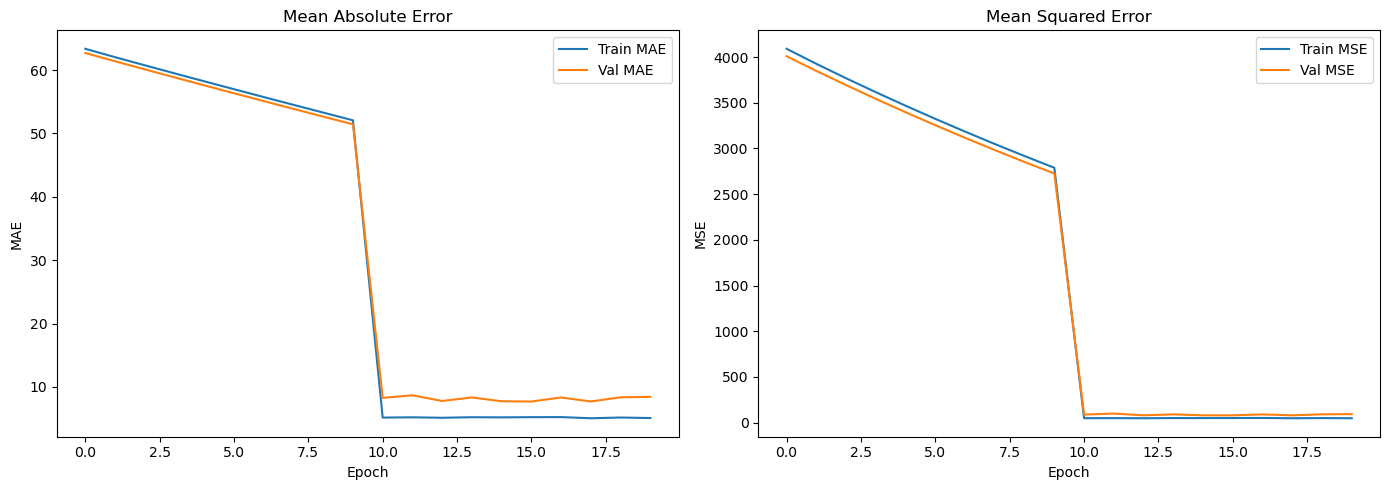

In [58]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2B0
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam

# === CONFIG ===
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS_INITIAL = 10
FINE_TUNE_EPOCHS = 10
SEED = 123

# === PATHS ===
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
META_CSV = os.path.join(BASE_PATH, "meta_train.csv")
TRAIN_DIR = os.path.join(BASE_PATH, "dataset_age", "train")
VAL_DIR = os.path.join(BASE_PATH, "dataset_age", "val")

IMG_EXT = (".jpg", ".jpeg", ".png")

# === LOAD LABELS ===
df = pd.read_csv(META_CSV)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age', 'image_id'])

# === Helper to load file paths and ages ===
def get_image_paths_and_labels(folder, df):
    paths = []
    labels = []
    for subdir, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(IMG_EXT):
                full_path = os.path.join(subdir, file)
                image_id = file
                age = df.loc[df['image_id'] == image_id, 'age']
                if not age.empty:
                    paths.append(full_path)
                    labels.append(age.values[0])
    return paths, labels

# === Load training and validation data ===
train_paths, train_labels = get_image_paths_and_labels(TRAIN_DIR, df)
val_paths, val_labels = get_image_paths_and_labels(VAL_DIR, df)

# === Convert to tf.data.Dataset ===
def create_dataset(paths, labels, is_training=True):
    path_ds = tf.data.Dataset.from_tensor_slices(paths)
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    img_ds = path_ds.map(lambda x: load_and_preprocess(x), num_parallel_calls=tf.data.AUTOTUNE)
    ds = tf.data.Dataset.zip((img_ds, label_ds))
    if is_training:
        ds = ds.shuffle(1000, seed=SEED)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

def load_and_preprocess(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    return img

train_ds = create_dataset(train_paths, train_labels, is_training=True)
val_ds = create_dataset(val_paths, val_labels, is_training=False)

# === MODEL ===
base_model = EfficientNetV2B0(include_top=False, weights=None, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# === Initial Training ===
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS_INITIAL)

# === Fine-tuning ===
base_model.trainable = True
model.compile(optimizer=Adam(1e-5), loss='mse', metrics=['mae'])
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INITIAL + FINE_TUNE_EPOCHS,
    initial_epoch=history.epoch[-1]
)

# === Plot Training Curves ===
loss = history.history['loss'] + history_fine.history['loss'][1:]
val_loss = history.history['val_loss'] + history_fine.history['val_loss'][1:]
mae = history.history['mae'] + history_fine.history['mae'][1:]
val_mae = history.history['val_mae'] + history_fine.history['val_mae'][1:]
epochs_range = range(EPOCHS_INITIAL + FINE_TUNE_EPOCHS)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Train MAE')
plt.plot(epochs_range, val_mae, label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train MSE')
plt.plot(epochs_range, val_loss, label='Val MSE')
plt.title('Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


Found 8325 files belonging to 5 classes.
Found 2082 files belonging to 5 classes.
Epoch 1/10


2025-06-01 17:13:05.927071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 1.6111 - accuracy: 0.1029

2025-06-01 17:13:46.550391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 55s 192ms/step - loss: 1.6111 - accuracy: 0.1029 - val_loss: 1.6099 - val_accuracy: 0.2959 - lr: 0.0010
Epoch 2/10
261/261 [==============================] - 45s 173ms/step - loss: 1.6112 - accuracy: 0.1565 - val_loss: 1.6087 - val_accuracy: 0.2959 - lr: 0.0010
Epoch 3/10
261/261 [==============================] - 46s 174ms/step - loss: 1.6111 - accuracy: 0.1719 - val_loss: 1.6104 - val_accuracy: 0.2959 - lr: 0.0010
Epoch 4/10
261/261 [==============================] - 42s 162ms/step - loss: 1.6112 - accuracy: 0.1504 - val_loss: 1.6096 - val_accuracy: 0.2959 - lr: 0.0010
Epoch 5/10
261/261 [==============================] - 42s 162ms/step - loss: 1.6110 - accuracy: 0.1983 - val_loss: 1.6101 - val_accuracy: 0.2959 - lr: 5.0000e-04
Epoch 6/10
261/261 [==============================] - 43s 162ms/step - loss: 1.6110 - accuracy: 0.1763 - val_loss: 1.6112 - val_accuracy: 0.2959 - lr: 5.0000e-04
Epoch 7/10
261/261 [==============================] - 4

2025-06-01 17:18:40.800716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 1.6109 - accuracy: 0.1636

2025-06-01 17:21:03.883169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 174s 556ms/step - loss: 1.6109 - accuracy: 0.1636 - val_loss: 1.6086 - val_accuracy: 0.2959 - lr: 1.0000e-05
Epoch 9/20
261/261 [==============================] - 136s 517ms/step - loss: 1.6109 - accuracy: 0.2095 - val_loss: 1.6093 - val_accuracy: 0.2959 - lr: 1.0000e-05
Epoch 10/20
261/261 [==============================] - 138s 528ms/step - loss: 1.6108 - accuracy: 0.1614 - val_loss: 1.6094 - val_accuracy: 0.2959 - lr: 1.0000e-05
Epoch 11/20
261/261 [==============================] - 147s 560ms/step - loss: 1.6107 - accuracy: 0.2320 - val_loss: 1.6095 - val_accuracy: 0.2959 - lr: 5.0000e-06
Epoch 12/20
261/261 [==============================] - 160s 610ms/step - loss: 1.6107 - accuracy: 0.2323 - val_loss: 1.6087 - val_accuracy: 0.2959 - lr: 5.0000e-06
Epoch 13/20
261/261 [==============================] - 147s 558ms/step - loss: 1.6107 - accuracy: 0.2131 - val_loss: 1.6091 - val_accuracy: 0.2959 - lr: 2.5000e-06


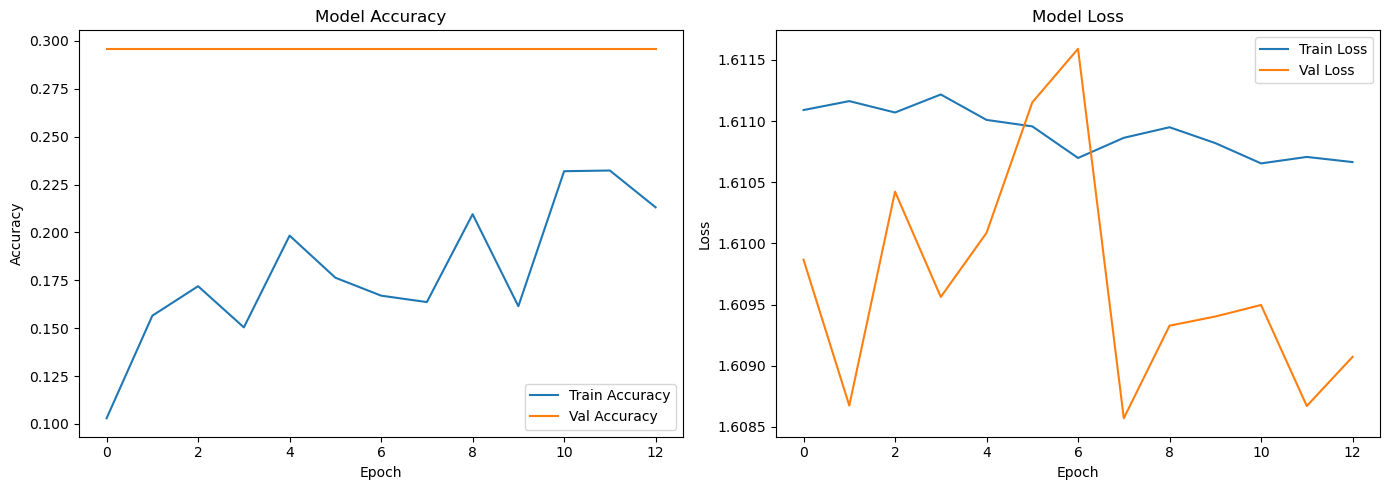

In [59]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# === CONFIG ===
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS_INITIAL = 10
FINE_TUNE_EPOCHS = 10
SEED = 123

# === CLASS WEIGHTS ===
class_weight_dict = {
    40: 4.1216,
    50: 1.7669,
    60: 0.6474,
    70: 0.4762,
    80: 1.8290
}

# === PATH SETUP ===
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
TRAIN_DIR = os.path.join(BASE_PATH, "dataset_age", "train")
VAL_DIR = os.path.join(BASE_PATH, "dataset_age", "val")

# === RAW DATASETS ===
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

raw_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VAL_DIR,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = raw_train_ds.class_names
age_to_index = {int(name): idx for idx, name in enumerate(class_names)}
class_weight_indexed = {age_to_index[k]: v for k, v in class_weight_dict.items()}

normalization_layer = layers.Rescaling(1. / 255)
train_ds = raw_train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = raw_val_ds.map(lambda x, y: (normalization_layer(x), y))

# === MODEL ===
base_model = EfficientNetV2B0(include_top=False, weights=None, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2)
]

# === TRAIN ===
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INITIAL,
    class_weight=class_weight_indexed,
    callbacks=callbacks
)

# === UNFREEZE & FINE-TUNE ===
base_model.trainable = True
model.compile(
    optimizer=Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INITIAL + FINE_TUNE_EPOCHS,
    initial_epoch=history.epoch[-1] + 1,
    class_weight=class_weight_indexed,
    callbacks=callbacks
)

# === PLOT ===
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


2025-06-02 09:00:36.333693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 3264.6633 - regression_loss: 4080.4636 - classification_loss: 1.4716 - regression_mae: 63.2715 - classification_accuracy: 0.4523

2025-06-02 09:00:57.667258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 31s 93ms/step - loss: 3264.6633 - regression_loss: 4080.4636 - classification_loss: 1.4716 - regression_mae: 63.2715 - classification_accuracy: 0.4523 - val_loss: 3192.3789 - val_regression_loss: 3990.1265 - val_classification_loss: 1.3939 - val_regression_mae: 62.5281 - val_classification_accuracy: 0.4299
Epoch 2/10
261/261 [==============================] - 21s 80ms/step - loss: 3116.4202 - regression_loss: 3895.1790 - classification_loss: 1.3846 - regression_mae: 61.7876 - classification_accuracy: 0.4001 - val_loss: 3048.8455 - val_regression_loss: 3810.7097 - val_classification_loss: 1.3873 - val_regression_mae: 61.0766 - val_classification_accuracy: 0.4299
Epoch 3/10
261/261 [==============================] - 21s 78ms/step - loss: 2975.2869 - regression_loss: 3718.7634 - classification_loss: 1.3912 - regression_mae: 60.3430 - classification_accuracy: 0.3849 - val_loss: 2910.7712 - val_regression_loss: 3638.1147 - val_classification_loss: 

2025-06-02 09:35:13.033685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 72.9447 - regression_loss: 90.3503 - classification_loss: 3.3224 - regression_mae: 6.4810 - classification_accuracy: 0.4175

2025-06-02 09:51:52.354936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 1946s 4s/step - loss: 72.9447 - regression_loss: 90.3503 - classification_loss: 3.3224 - regression_mae: 6.4810 - classification_accuracy: 0.4175 - val_loss: 75.8800 - val_regression_loss: 94.0099 - val_classification_loss: 3.3604 - val_regression_mae: 8.4450 - val_classification_accuracy: 0.4299
Epoch 11/20
261/261 [==============================] - 1911s 7s/step - loss: 39.8296 - regression_loss: 48.9333 - classification_loss: 3.4144 - regression_mae: 5.1321 - classification_accuracy: 0.4175 - val_loss: 74.5531 - val_regression_loss: 92.3614 - val_classification_loss: 3.3203 - val_regression_mae: 8.3968 - val_classification_accuracy: 0.4299
Epoch 12/20
261/261 [==============================] - 984s 4s/step - loss: 40.2873 - regression_loss: 49.5184 - classification_loss: 3.3630 - regression_mae: 5.1949 - classification_accuracy: 0.4175 - val_loss: 84.6438 - val_regression_loss: 105.0083 - val_classification_loss: 3.1862 - val_regression_mae

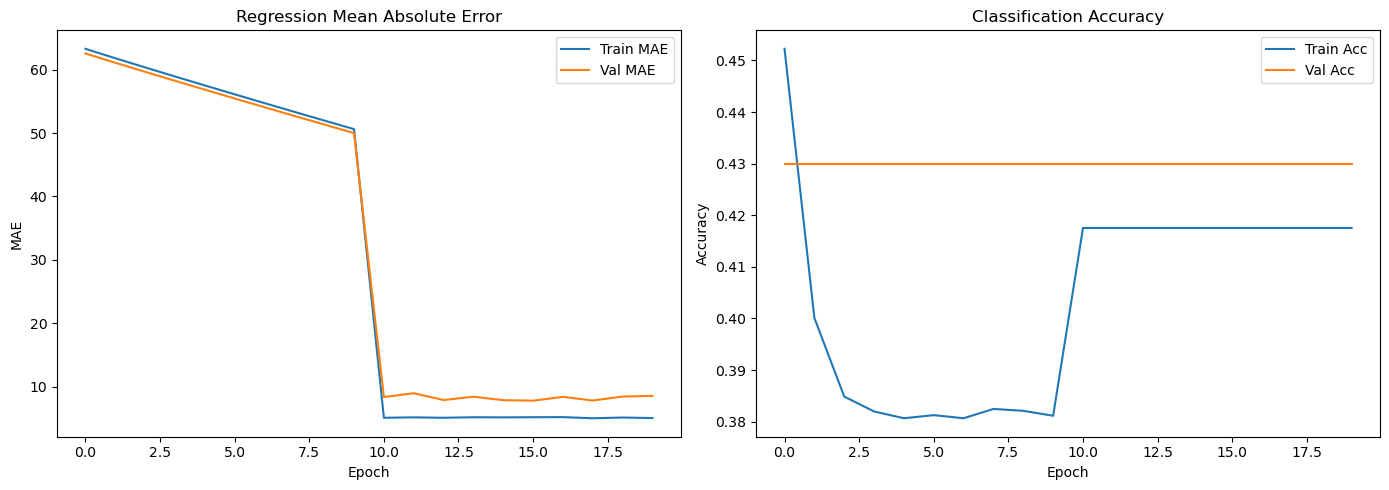

In [67]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt

# === CONFIG ===
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS_INITIAL = 10
FINE_TUNE_EPOCHS = 10
SEED = 123

# === PATHS ===
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
META_CSV = os.path.join(BASE_PATH, "meta_train.csv")
TRAIN_DIR = os.path.join(BASE_PATH, "dataset_age", "train")
VAL_DIR = os.path.join(BASE_PATH, "dataset_age", "val")
IMG_EXT = (".jpg", ".jpeg", ".png")

# === LOAD LABELS ===
df = pd.read_csv(META_CSV)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age', 'image_id'])

# === Binning age into 5 classes: 40, 50, 60, 70, 80 ===
def bin_age(age):
    return int(np.round(age / 10) * 10)

df['age_class'] = df['age'].apply(bin_age)
age_class_mapping = {age: idx for idx, age in enumerate(sorted(df['age_class'].unique()))}
df['age_class_idx'] = df['age_class'].map(age_class_mapping)

# === Helper to load image paths and labels ===
def get_image_paths_and_labels(folder, df):
    paths, age_vals, class_idxs = [], [], []
    for subdir, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(IMG_EXT):
                full_path = os.path.join(subdir, file)
                row = df[df['image_id'] == file]
                if not row.empty:
                    paths.append(full_path)
                    age_vals.append(row['age'].values[0])
                    class_idxs.append(row['age_class_idx'].values[0])
    return paths, age_vals, class_idxs

train_paths, train_ages, train_classes = get_image_paths_and_labels(TRAIN_DIR, df)
val_paths, val_ages, val_classes = get_image_paths_and_labels(VAL_DIR, df)

# === DATASET CREATION ===
def load_and_preprocess(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    return tf.cast(img, tf.float32) / 255.0

def create_dataset(paths, ages, classes, is_training=True):
    path_ds = tf.data.Dataset.from_tensor_slices(paths)
    age_ds = tf.data.Dataset.from_tensor_slices(ages)
    class_ds = tf.data.Dataset.from_tensor_slices(classes)
    img_ds = path_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    ds = tf.data.Dataset.zip(((img_ds), {'regression': age_ds, 'classification': class_ds}))
    if is_training:
        ds = ds.shuffle(1000, seed=SEED)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = create_dataset(train_paths, train_ages, train_classes, is_training=True)
val_ds = create_dataset(val_paths, val_ages, val_classes, is_training=False)

# === MODEL SETUP ===
base_model = EfficientNetV2B0(include_top=False, weights=None, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)

reg_output = layers.Dense(1, name="regression")(x)
class_output = layers.Dense(len(age_class_mapping), activation="softmax", name="classification")(x)

model = keras.Model(inputs, outputs=[reg_output, class_output])

model.compile(
    optimizer=Adam(),
    loss={
        "regression": "mse",
        "classification": "sparse_categorical_crossentropy"
    },
    loss_weights={
        "regression": 0.8,
        "classification": 0.2
    },
    metrics={
        "regression": ["mae"],
        "classification": ["accuracy"]
    }
)

# === INITIAL TRAINING ===
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS_INITIAL)

# === FINE-TUNING ===
base_model.trainable = True
model.compile(
    optimizer=Adam(1e-5),
    loss={
        "regression": "mse",
        "classification": "sparse_categorical_crossentropy"
    },
    loss_weights={
        "regression": 0.8,
        "classification": 0.2
    },
    metrics={
        "regression": ["mae"],
        "classification": ["accuracy"]
    }
)

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INITIAL + FINE_TUNE_EPOCHS,
    initial_epoch=history.epoch[-1]
)

# === PLOT TRAINING CURVES ===
reg_mae = history.history['regression_mae'] + history_fine.history['regression_mae'][1:]
val_reg_mae = history.history['val_regression_mae'] + history_fine.history['val_regression_mae'][1:]
cls_acc = history.history['classification_accuracy'] + history_fine.history['classification_accuracy'][1:]
val_cls_acc = history.history['val_classification_accuracy'] + history_fine.history['val_classification_accuracy'][1:]

epochs_range = range(EPOCHS_INITIAL + FINE_TUNE_EPOCHS)

plt.figure(figsize=(14, 5))

# Regression MAE
plt.subplot(1, 2, 1)
plt.plot(epochs_range, reg_mae, label="Train MAE")
plt.plot(epochs_range, val_reg_mae, label="Val MAE")
plt.title("Regression Mean Absolute Error")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()

# Classification Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cls_acc, label="Train Acc")
plt.plot(epochs_range, val_cls_acc, label="Val Acc")
plt.title("Classification Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/20


2025-06-02 11:36:22.080592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 3276.2136 - regression_loss: 4094.9094 - classification_loss: 1.4257 - regression_mae: 63.3822 - classification_accuracy: 0.4598

2025-06-02 11:36:41.322757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 28s 93ms/step - loss: 3276.2136 - regression_loss: 4094.9094 - classification_loss: 1.4257 - regression_mae: 63.3822 - classification_accuracy: 0.4598 - val_loss: 3213.6670 - val_regression_loss: 4016.7493 - val_classification_loss: 1.3329 - val_regression_mae: 62.7406 - val_classification_accuracy: 0.4467 - lr: 0.0010
Epoch 2/20
261/261 [==============================] - 22s 83ms/step - loss: 3149.1543 - regression_loss: 3936.1140 - classification_loss: 1.3131 - regression_mae: 62.1150 - classification_accuracy: 0.4037 - val_loss: 3089.2812 - val_regression_loss: 3861.2747 - val_classification_loss: 1.3054 - val_regression_mae: 61.4891 - val_classification_accuracy: 0.4467 - lr: 0.0010
Epoch 3/20
261/261 [==============================] - 23s 85ms/step - loss: 3027.5586 - regression_loss: 3784.1230 - classification_loss: 1.3056 - regression_mae: 60.8792 - classification_accuracy: 0.4026 - val_loss: 2969.0349 - val_regression_loss: 3710.9670 -

2025-06-02 11:43:56.450965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 49.7691 - regression_loss: 61.7285 - classification_loss: 1.9314 - regression_mae: 5.7138 - classification_accuracy: 0.4378

2025-06-02 11:45:07.457479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 89s 277ms/step - loss: 49.7691 - regression_loss: 61.7285 - classification_loss: 1.9314 - regression_mae: 5.7138 - classification_accuracy: 0.4378 - val_loss: 78.8272 - val_regression_loss: 98.0588 - val_classification_loss: 1.9007 - val_regression_mae: 8.6025 - val_classification_accuracy: 0.4467 - lr: 1.0000e-05
Epoch 22/40
261/261 [==============================] - 64s 243ms/step - loss: 39.3057 - regression_loss: 48.6488 - classification_loss: 1.9335 - regression_mae: 5.1551 - classification_accuracy: 0.4378 - val_loss: 68.9036 - val_regression_loss: 85.6471 - val_classification_loss: 1.9297 - val_regression_mae: 8.1549 - val_classification_accuracy: 0.4467 - lr: 1.0000e-05
Epoch 23/40
261/261 [==============================] - 62s 237ms/step - loss: 40.8545 - regression_loss: 50.5878 - classification_loss: 1.9210 - regression_mae: 5.2070 - classification_accuracy: 0.4378 - val_loss: 87.4742 - val_regression_loss: 108.8827 - val_classifica

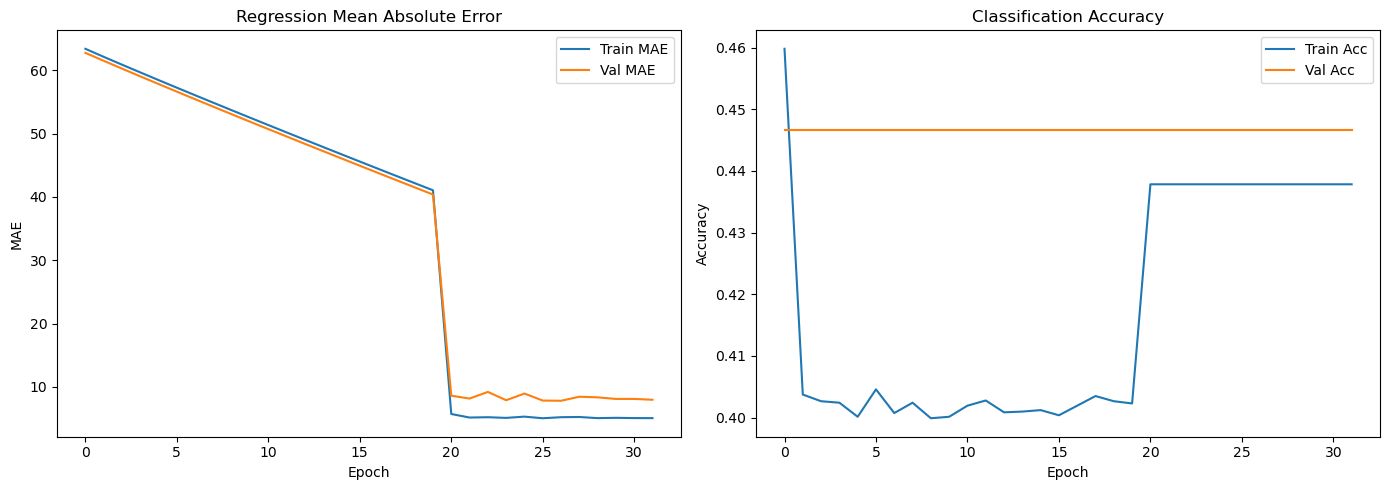

In [75]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# === CONFIG ===
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS_INITIAL = 20
FINE_TUNE_EPOCHS = 20
SEED = 123

# === PATHS ===
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
META_CSV = os.path.join(BASE_PATH, "meta_train.csv")
TRAIN_DIR = os.path.join(BASE_PATH, "dataset_age", "train")
VAL_DIR = os.path.join(BASE_PATH, "dataset_age", "val")
IMG_EXT = (".jpg", ".jpeg", ".png")

# === LOAD METADATA ===
df = pd.read_csv(META_CSV)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age', 'image_id'])
df['age_class'] = df['age'].round(-1).astype(int)

# === FILE → LABEL MAPPING ===
def get_image_paths_and_labels(folder, df, label_type="regression"):
    paths, regression_labels, classification_labels = [], [], []

    for subdir, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(IMG_EXT):
                full_path = os.path.join(subdir, file)
                image_id = file
                record = df[df['image_id'] == image_id]
                if record.empty:
                    continue

                age = record['age'].values[0]
                age_class = str((int(age) // 10) * 10)  # e.g., 45 -> 40, 79 -> 70

                paths.append(full_path)
                regression_labels.append(age)
                classification_labels.append(age_class)

    if label_type == "regression":
        return paths, regression_labels
    elif label_type == "classification":
        return paths, classification_labels
    elif label_type == "both":
        return paths, regression_labels, classification_labels
    else:
        raise ValueError("label_type must be 'regression', 'classification', or 'both'")


# === LABEL ENCODING ===
class_bins = sorted(df['age_class'].unique().tolist())
class_to_idx = {cls: idx for idx, cls in enumerate(class_bins)}
df['age_class_idx'] = df['age_class'].map(class_to_idx)

# === DATA LOADER ===
def load_and_preprocess(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    return img

def create_dataset(paths, reg_labels, class_labels, is_training=True):
    path_ds = tf.data.Dataset.from_tensor_slices(paths)
    reg_ds = tf.data.Dataset.from_tensor_slices(reg_labels)
    class_ds = tf.data.Dataset.from_tensor_slices(class_labels)
    img_ds = path_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    ds = tf.data.Dataset.zip((img_ds, (reg_ds, class_ds)))
    if is_training:
        ds = ds.shuffle(1000, seed=SEED)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# === DATASET BUILD ===
train_paths, train_reg, train_class = get_image_paths_and_labels(TRAIN_DIR, df, label_type='both')
val_paths, val_reg, val_class = get_image_paths_and_labels(VAL_DIR, df, label_type='both')

train_class_idx = [class_to_idx[int(c)] for c in train_class if int(c) in class_to_idx]
val_class_idx = [class_to_idx[int(c)] for c in val_class if int(c) in class_to_idx]


train_ds = create_dataset(train_paths, train_reg, train_class_idx)
val_ds = create_dataset(val_paths, val_reg, val_class_idx)

# === HYBRID MODEL ===
base_model = EfficientNetV2B0(include_top=False, weights=None, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)

reg_output = layers.Dense(1, name="regression")(x)
class_output = layers.Dense(len(class_bins), activation="softmax", name="classification")(x)

model = keras.Model(inputs=inputs, outputs=[reg_output, class_output])

model.compile(
    optimizer=Adam(),
    loss={
        "regression": "mse",
        "classification": "sparse_categorical_crossentropy"
    },
    loss_weights={"regression": 0.8, "classification": 0.2},
    metrics={"regression": "mae", "classification": "accuracy"}
)

# === CALLBACKS ===
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# === INITIAL TRAINING ===
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INITIAL,
    callbacks=callbacks
)

# === FINE-TUNING ===
base_model.trainable = True
model.compile(
    optimizer=Adam(1e-5),
    loss={
        "regression": "mse",
        "classification": "sparse_categorical_crossentropy"
    },
    loss_weights={"regression": 0.8, "classification": 0.2},
    metrics={"regression": "mae", "classification": "accuracy"}
)

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INITIAL + FINE_TUNE_EPOCHS,
    initial_epoch=history.epoch[-1] + 1,
    callbacks=callbacks
)

# === PLOT ===
def plot_history(h1, h2):
    def get(metric): return h1[metric] + h2[metric]
    epochs = range(len(get("regression_mae")))

    plt.figure(figsize=(14, 5))

    # Regression
    plt.subplot(1, 2, 1)
    plt.plot(epochs, get("regression_mae"), label="Train MAE")
    plt.plot(epochs, get("val_regression_mae"), label="Val MAE")
    plt.title("Regression Mean Absolute Error")
    plt.xlabel("Epoch")
    plt.ylabel("MAE")
    plt.legend()

    # Classification
    plt.subplot(1, 2, 2)
    plt.plot(epochs, get("classification_accuracy"), label="Train Acc")
    plt.plot(epochs, get("val_classification_accuracy"), label="Val Acc")
    plt.title("Classification Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history.history, history_fine.history)


In [85]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import CosineDecayRestarts
import matplotlib.pyplot as plt

# === CONFIG ===
IMG_SIZE = 256
BATCH_SIZE = 32
EPOCHS_INITIAL = 20
FINE_TUNE_EPOCHS = 20
SEED = 123

# === PATHS ===
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
META_CSV = os.path.join(BASE_PATH, "meta_train.csv")
TRAIN_DIR = os.path.join(BASE_PATH, "dataset_age", "train")
VAL_DIR = os.path.join(BASE_PATH, "dataset_age", "val")
IMG_EXT = (".jpg", ".jpeg", ".png")

# === METADATA ===
df = pd.read_csv(META_CSV)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age', 'image_id'])
df['age_class'] = df['age'].round(-1).astype(int)

class_bins = sorted(df['age_class'].unique().tolist())
class_to_idx = {cls: idx for idx, cls in enumerate(class_bins)}
df['age_class_idx'] = df['age_class'].map(class_to_idx)

# === FILE → LABEL ===
def get_image_paths_and_labels(folder, df):
    paths, reg_labels, class_labels = [], [], []
    for subdir, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(IMG_EXT):
                full_path = os.path.join(subdir, file)
                record = df[df['image_id'] == file]
                if not record.empty:
                    paths.append(full_path)
                    reg_labels.append(record['age'].values[0])
                    class_labels.append(record['age_class_idx'].values[0])
    return paths, reg_labels, class_labels

# === IMAGE PIPELINE ===
def load_and_preprocess(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    return tf.cast(img, tf.float32) / 255.0

def create_dataset(paths, reg_labels, class_labels, is_training=True):
    path_ds = tf.data.Dataset.from_tensor_slices(paths)
    reg_ds = tf.data.Dataset.from_tensor_slices(reg_labels)
    class_ds = tf.data.Dataset.from_tensor_slices(class_labels)
    img_ds = path_ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    ds = tf.data.Dataset.zip((img_ds, (reg_ds, class_ds)))
    if is_training:
        ds = ds.shuffle(1000, seed=SEED)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# === DATASET ===
train_paths, train_reg, train_class = get_image_paths_and_labels(TRAIN_DIR, df)
val_paths, val_reg, val_class = get_image_paths_and_labels(VAL_DIR, df)
train_ds = create_dataset(train_paths, train_reg, train_class)
val_ds = create_dataset(val_paths, val_reg, val_class, is_training=False)

# === LEARNING RATE SCHEDULER (Safe Wrapper) ===
class CustomAdam(tf.keras.optimizers.legacy.Adam):
    def __init__(self, lr_schedule, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.lr_schedule = lr_schedule

    def _decayed_lr(self, var_dtype):
        return self.lr_schedule(self.iterations)

    @property
    def learning_rate(self):
        return self.lr_schedule(self.iterations)

    @learning_rate.setter
    def learning_rate(self, lr):
        self._set_hyper("learning_rate", lr)

lr_schedule = CosineDecayRestarts(
    initial_learning_rate=1e-3,
    first_decay_steps=10,
    t_mul=2.0,
    m_mul=1.0,
    alpha=1e-5
)

# === MODEL ===
base_model = EfficientNetV2B0(include_top=False, weights=None, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
reg_output = layers.Dense(1, name="regression")(x)
cls_output = layers.Dense(len(class_bins), activation="softmax", name="classification")(x)

model = keras.Model(inputs, outputs=[reg_output, cls_output])

model.compile(
    optimizer=CustomAdam(lr_schedule=lr_schedule),
    loss={
        "regression": "mse",
        "classification": SparseCategoricalCrossentropy(label_smoothing=0.1)
    },
    loss_weights={"regression": 0.85, "classification": 0.15},
    metrics={"regression": "mae", "classification": "accuracy"}
)

# === CALLBACKS ===
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)
]

# === TRAINING ===
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INITIAL,
    callbacks=callbacks
)

# === FINE-TUNING ===
base_model.trainable = True
model.compile(
    optimizer=Adam(1e-5),
    loss={
        "regression": "mse",
        "classification": SparseCategoricalCrossentropy(label_smoothing=0.1)
    },
    loss_weights={"regression": 0.85, "classification": 0.15},
    metrics={"regression": "mae", "classification": "accuracy"}
)

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_INITIAL + FINE_TUNE_EPOCHS,
    initial_epoch=history.epoch[-1] + 1,
    callbacks=callbacks
)

# === PLOT ===
def plot_history(h1, h2):
    def get(metric): return h1[metric] + h2[metric]
    epochs = range(len(get("regression_mae")))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, get("regression_mae"), label="Train MAE")
    plt.plot(epochs, get("val_regression_mae"), label="Val MAE")
    plt.title("Regression MAE")
    plt.xlabel("Epoch")
    plt.ylabel("MAE")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, get("classification_accuracy"), label="Train Acc")
    plt.plot(epochs, get("val_classification_accuracy"), label="Val Acc")
    plt.title("Classification Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history.history, history_fine.history)


TypeError: __init__() got an unexpected keyword argument 'label_smoothing'